<a href="https://colab.research.google.com/github/SPauloG/Bootcamp_BairesDevDio/blob/main/Sistema_de_recomendacao_por_imagens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Instalar bibliotecas necessárias
!pip install kaggle

In [ ]:
#Configurar o Kaggle
from google.colab import files
files.upload()  # Faça upload do seu arquivo kaggle.json aqui

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
#Baixar e extrair o dataset do Kaggle
!kaggle datasets download -d sunnykusawa/ecommerce-products-image-dataset
!unzip ecommerce-products-image-dataset.zip -d ecommerce-products-image-dataset

Dataset URL: https://www.kaggle.com/datasets/sunnykusawa/ecommerce-products-image-dataset
License(s): CC0-1.0
 96% 39.0M/40.4M [00:04<00:00, 16.7MB/s]
100% 40.4M/40.4M [00:04<00:00, 10.5MB/s]
Archive:  ecommerce-products-image-dataset.zip
  inflating: ecommerce-products-image-dataset/ecommerce products/jeans/1.jpg  
  inflating: ecommerce-products-image-dataset/ecommerce products/jeans/10.jpg  
  inflating: ecommerce-products-image-dataset/ecommerce products/jeans/100.jpg  
  inflating: ecommerce-products-image-dataset/ecommerce products/jeans/101.jpg  
  inflating: ecommerce-products-image-dataset/ecommerce products/jeans/102.jpg  
  inflating: ecommerce-products-image-dataset/ecommerce products/jeans/103.jpg  
  inflating: ecommerce-products-image-dataset/ecommerce products/jeans/104.jpg  
  inflating: ecommerce-products-image-dataset/ecommerce products/jeans/105.jpg  
  inflating: ecommerce-products-image-dataset/ecommerce products/jeans/106.jpg  
  inflating: ecommerce-products-ima

In [ ]:
#Importar bibliotecas necessárias
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Model
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

In [ ]:
#Carregar o modelo pré-treinado
base_model = ResNet50(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('avg_pool').output)

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
#Função para extrair características de uma imagem
def extract_features(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model.predict(x)
    return features.flatten()

In [ ]:
#Extrair características de todas as imagens
dataset_path = '/content/ecommerce-products-image-dataset/ecommerce products'
features = {}
for category in ['jeans', 'sofa', 'tshirt', 'tv']:
    category_path = os.path.join(dataset_path, category)
    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
        features[img_path] = extract_features(img_path)

print(f"Extracted features from {len(features)} images.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━

In [10]:
#Função para obter recomendações
def get_recommendations(image_path, n=5):
    input_features = extract_features(image_path)
    similarities = {}
    for path, feat in features.items():
        similarity = cosine_similarity(input_features.reshape(1, -1), feat.reshape(1, -1))[0][0]
        similarities[path] = similarity

    sorted_similarities = sorted(similarities.items(), key=lambda x: x[1], reverse=True)
    return [path for path, _ in sorted_similarities[1:n+1]]  # Excluir a própria imagem

In [11]:
#Função para mostrar recomendações
def show_recommendations(input_image, recommendations):
    plt.figure(figsize=(20, 4))
    plt.subplot(1, 6, 1)
    plt.imshow(image.load_img(input_image))
    plt.title('Input Image')
    plt.axis('off')

    for i, rec in enumerate(recommendations):
        plt.subplot(1, 6, i+2)
        plt.imshow(image.load_img(rec))
        plt.title(f'Recommendation {i+1}')
        plt.axis('off')

    plt.show()

Saving Walsunny-Convertible-Sectional-Sofa-Couch-L-Shaped-Couch-with-Modern-Linen-Fabric-for-Small-Space-Dark-Gray_7ffd4207-c1e3-40f0-ac5f-3a34e78894e3.089b1f624abf5a1b42257150694d59b7.jpeg to Walsunny-Convertible-Sectional-Sofa-Couch-L-Shaped-Couch-with-Modern-Linen-Fabric-for-Small-Space-Dark-Gray_7ffd4207-c1e3-40f0-ac5f-3a34e78894e3.089b1f624abf5a1b42257150694d59b7.jpeg
Imagem 'Walsunny-Convertible-Sectional-Sofa-Couch-L-Shaped-Couch-with-Modern-Linen-Fabric-for-Small-Space-Dark-Gray_7ffd4207-c1e3-40f0-ac5f-3a34e78894e3.089b1f624abf5a1b42257150694d59b7.jpeg' foi carregada com sucesso.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


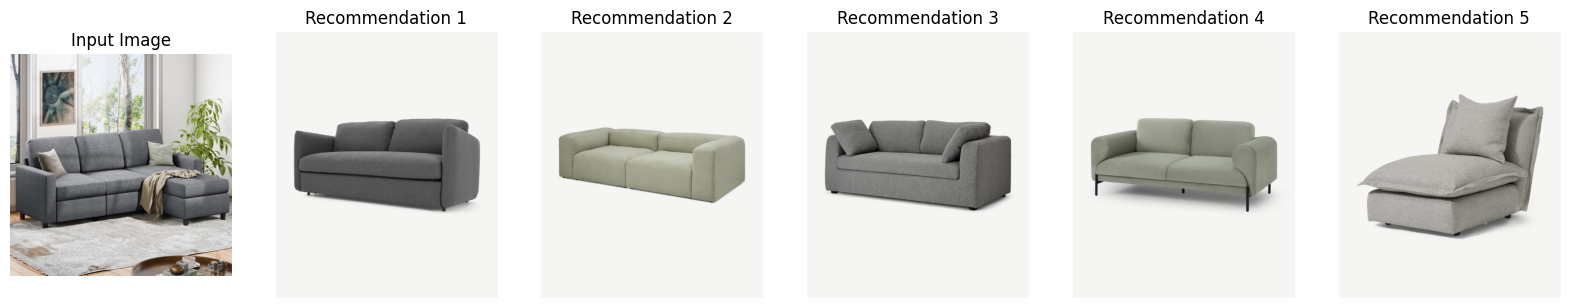

In [13]:
#Função para permitir o upload de uma imagem
def upload_and_recommend():
    uploaded = files.upload()
    for filename in uploaded.keys():
        # Salvar a imagem uploaded
        with open(filename, 'wb') as f:
            f.write(uploaded[filename])

        print(f"Imagem '{filename}' foi carregada com sucesso.")

        # Gerar recomendações
        recommendations = get_recommendations(filename)

        # Mostrar recomendações
        show_recommendations(filename, recommendations)

# Chamar a função para upload e recomendação
upload_and_recommend()